# Import libraries and reading dataset

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from datetime import datetime


In [148]:
colnames = ['Variance_WT_image','Skewness_WT_image','Kurtosis_WT_image','Entropy_image','Class']
df = pd.read_csv('data_banknote_authentication.csv',names=colnames)
df.head(3)

,Variance_WT_image,Skewness_WT_image,Kurtosis_WT_image,Entropy_image,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [149]:
#Shuffling the datapoints in the dataset
df = df.sample(frac=1,random_state=100)

In [150]:
df.shape

(1372, 5)

In [151]:
df.describe()

,Variance_WT_image,Skewness_WT_image,Kurtosis_WT_image,Entropy_image,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [152]:
df['Class'] = df['Class'].map({0:'authentic',1:'unauthentic'})

In [153]:
df.head(3)

,Variance_WT_image,Skewness_WT_image,Kurtosis_WT_image,Entropy_image,Class
1058,-1.5621,-2.2121,4.2591,0.27972,unauthentic
714,2.5559,3.3605,2.0321,0.26809,authentic
1061,-2.3147,3.6668,-0.6969,-1.24740,unauthentic


# Exploratory Data Analysis

In [154]:
# Univariate analysis of Target variable and to understand its spread/distribution
# Pie chrt indicates class is fairly balanced with ratio of 56:44 in favour of authentic
df['Class'].value_counts()

authentic      762
unauthentic    610
Name: Class, dtype: int64

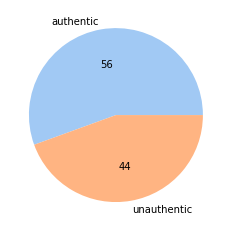

In [155]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Class'].value_counts(), labels=['authentic','unauthentic'],colors=colors,autopct='%.0f')
plt.show()

<AxesSubplot:>

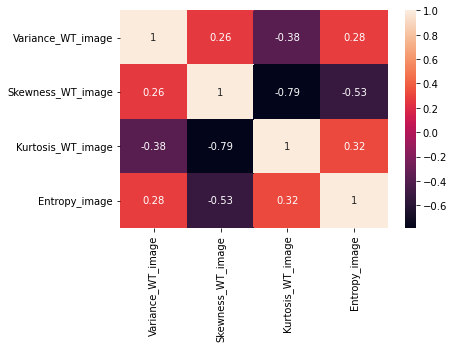

In [156]:
#Checking corelation between independent variables
sns.heatmap(df.iloc[:,0:4].corr(),annot=True)

<AxesSubplot:ylabel='Entropy_image'>

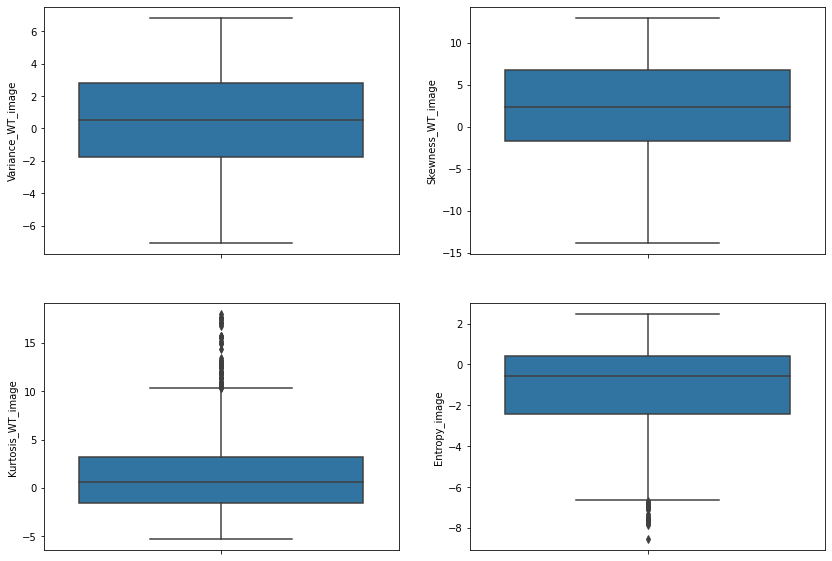

In [157]:
#Creating a subplot to create boxplot for each independent variable to understand variable distribution
fig, ax = plt.subplots(2, 2, figsize=(14,10))

sns.boxplot(data=df,y='Variance_WT_image',ax=ax[0][0])
sns.boxplot(data=df,y='Skewness_WT_image',ax=ax[0][1])
sns.boxplot(data=df,y='Kurtosis_WT_image',ax=ax[1][0])
sns.boxplot(data=df,y='Entropy_image',ax=ax[1][1])

In [158]:
#sample = df.head(100)
#sns.catplot(data=sample,x="Variance_WT_image",y="Skewness_WT_image",hue="Class")

# Splitting original dataset into Train set & Test set

In [159]:

train_df, test_df = train_test_split(df, train_size=0.7,random_state=100)
train_df.shape, test_df.shape

((960, 5), (412, 5))

In [160]:
y = train_df.pop('Class')
X = train_df
X.shape, y.shape

((960, 4), (960,))

In [161]:
#Splitting above created train set into Train set & validation set
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.7, random_state=100)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((672, 4), (672,), (288, 4), (288,))

In [162]:
X_train.head(2)

,Variance_WT_image,Skewness_WT_image,Kurtosis_WT_image,Entropy_image
553,3.0672,-4.4117,3.8238,-0.81682
241,-1.3931,1.5664,7.5382,0.78403


In [163]:
X_val.head(2)

,Variance_WT_image,Skewness_WT_image,Kurtosis_WT_image,Entropy_image
462,4.9362,7.6046,-2.3429,-0.85302
492,-1.8411,10.8306,2.7690,-3.09010


# Standard Scaling of Training set

In [164]:
scaler = StandardScaler()

In [165]:
X_train_scaled = scaler.fit_transform(X_train)

In [166]:
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index ,columns=X_train.columns)
X_train_scaled.head(2)

,Variance_WT_image,Skewness_WT_image,Kurtosis_WT_image,Entropy_image
553,0.958379,-1.070030,0.531624,0.205560
241,-0.601453,-0.055758,1.372833,0.946415


In [167]:
y_train = y_train.map({'authentic':0,'unauthentic':1})
y_train.head(2)

553    0
241    0
Name: Class, dtype: int64

# Standard Scaling of Validation set

In [168]:
X_val_scaled =  scaler.transform(X_val)

In [169]:
X_val_scaled = pd.DataFrame(X_val_scaled, index=X_val.index ,columns=X_val.columns)
X_val_scaled.head(2)

,Variance_WT_image,Skewness_WT_image,Kurtosis_WT_image,Entropy_image
462,1.611995,0.968710,-0.864962,0.188807
492,-0.758125,1.516048,0.292741,-0.846489


In [170]:
y_val = y_val.map({'authentic':0,'unauthentic':1})
y_val.head(2)

462    0
492    0
Name: Class, dtype: int64

# Builing Logistic Regression Model

In [171]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

## Prediciting on Train data itself

In [172]:
logistic_regression_train_pred = logreg.predict(X_train_scaled)
logistic_regression_train_pred[:5]

array([0, 0, 0, 0, 0])

In [173]:
confusion_matrix(y_true=y_train, y_pred=logistic_regression_train_pred)

array([[355,  11],
       [  2, 304]])

In [174]:
tn,fp,fn,tp = confusion_matrix(y_true=y_train, y_pred=logistic_regression_train_pred).ravel()
logistic_regression_train_sensitivity = tp / (tp+fn)
logistic_regression_train_specificity = tn / (tn+fp)
logistic_regression_train_precision = tp / (tp+fp)
logistic_regression_train_recall = tp / (tp+fn)

In [175]:
logistic_regression_train_accuracy = accuracy_score(y_true=y_train, y_pred=logistic_regression_train_pred)
logistic_regression_train_accuracy

0.9806547619047619

In [176]:
logistic_regression_train_roc = roc_auc_score(y_true=y_train,y_score=logistic_regression_train_pred)
logistic_regression_train_roc

0.9817047037394192

In [177]:
logistic_regression_train_f1 = f1_score(y_true=y_train, y_pred=logistic_regression_train_pred)
logistic_regression_train_f1

0.9790660225442833

## Prediciting on Validation data 

In [178]:
logistic_regression_val_pred = logreg.predict(X_val_scaled)
logistic_regression_val_pred[:5]

array([0, 0, 0, 0, 0])

In [179]:
confusion_matrix(y_true=y_val, y_pred=logistic_regression_val_pred)

array([[168,   4],
       [  0, 116]])

In [180]:
tn,fp,fn,tp = confusion_matrix(y_true=y_val, y_pred=logistic_regression_val_pred).ravel()
logistic_regression_val_sensitivity = tp / (tp+fn)
logistic_regression_val_specificity = tn / (tn+fp)
logistic_regression_val_precision = tp / (tp+fp)
logistic_regression_val_recall = tp / (tp+fn)

In [181]:
logistic_regression_val_accuracy = accuracy_score(y_true=y_val, y_pred=logistic_regression_val_pred)
logistic_regression_val_accuracy

0.9861111111111112

In [182]:
logistic_regression_val_roc = roc_auc_score(y_true=y_val,y_score=logistic_regression_val_pred)
logistic_regression_val_roc

0.9883720930232558

In [183]:
logistic_regression_val_f1 = f1_score(y_true=y_val, y_pred=logistic_regression_val_pred)
logistic_regression_val_f1

0.983050847457627

# Builing Random Forest Classifier

In [184]:
rfc = RandomForestClassifier(random_state=100)

In [185]:
rfc_params={
    'n_estimators':[100,150],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf':[1,2,5,10,15],
    'max_leaf_nodes':[5,10,20,40,100],
    'max_depth':[3,5,7,10],
    'oob_score':['True']
}

In [186]:
#Need to maximise Precision i.e. reduce False negative (Idenitifying unauthentic note as authentic)
#Hyperparameter tuning on Random Forest Classifier
grid = GridSearchCV(
    param_grid=rfc_params,
    estimator=rfc,
    scoring='precision',
    n_jobs=-1,
    cv=5,
    verbose=10
)

In [187]:
#print(datetime.now())
#grid.fit(X_train_scaled, y_train)
#print(datetime.now())

In [188]:
#?grid

In [189]:
#grid.best_params_

In [190]:
#grid.best_estimator_
# RandomForestClassifier(max_depth=10, max_leaf_nodes=40, n_estimators=150, oob_score='True', random_state=100)

In [191]:
#grid.best_score_

In [192]:
rfc_hyper = RandomForestClassifier(max_depth=5, max_leaf_nodes=40, n_estimators=500,
                       oob_score='True', random_state=100)

In [193]:
rfc_hyper.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=40, n_estimators=500,
                       oob_score='True', random_state=100)

## Prediciting on Train data itself

In [194]:
randomforest_train_pred = rfc_hyper.predict(X_train_scaled)
randomforest_train_pred[:5]

array([0, 0, 0, 0, 0])

In [195]:
confusion_matrix(y_true=y_train, y_pred=randomforest_train_pred)

array([[360,   6],
       [  0, 306]])

In [196]:
tn,fp,fn,tp = confusion_matrix(y_true=y_train, y_pred=randomforest_train_pred).ravel()
randomforest_train_sensitivity = tp / (tp+fn)
randomforest_train_specificity = tn / (tn+fp)
randomforest_train_precision = tp / (tp+fp)
randomforest_train_recall = tp / (tp+fn)

In [197]:
randomforest_train_roc = roc_auc_score(y_true=y_train,y_score=randomforest_train_pred)
randomforest_train_roc

0.9918032786885246

In [198]:
randomforest_train_f1 = f1_score(y_true=y_train, y_pred=randomforest_train_pred)
randomforest_train_f1

0.9902912621359222

In [199]:
randomforest_train_accuracy = accuracy_score(y_true=y_train, y_pred=randomforest_train_pred)
randomforest_train_accuracy

0.9910714285714286

## Prediciting on Validation data 

In [200]:
randomforest_val_pred = rfc_hyper.predict(X_val_scaled)
randomforest_val_pred[:5]

array([0, 0, 0, 0, 0])

In [201]:
confusion_matrix(y_true=y_val, y_pred=randomforest_val_pred)

array([[168,   4],
       [  0, 116]])

In [202]:
tn,fp,fn,tp = confusion_matrix(y_true=y_val, y_pred=randomforest_val_pred).ravel()
randomforest_val_sensitivity = tp / (tp+fn)
randomforest_val_specificity = tn / (tn+fp)
randomforest_val_precision = tp / (tp+fp)
randomforest_val_recall = tp / (tp+fn)

In [203]:
randomforest_val_roc = roc_auc_score(y_true=y_val,y_score=randomforest_val_pred)
randomforest_val_roc

0.9883720930232558

In [204]:
randomforest_val_f1 = f1_score(y_true=y_val, y_pred=randomforest_val_pred)
randomforest_val_f1

0.983050847457627

In [205]:
randomforest_val_accuracy = accuracy_score(y_true=y_val, y_pred=randomforest_val_pred)
randomforest_val_accuracy

0.9861111111111112

# Model comparison

In [206]:
model_comparison_df = pd.DataFrame(data={'Model_name':['Logistic Regression', 'Basic Random Forest'],
            'Training accuracy':[logistic_regression_train_accuracy,randomforest_train_accuracy],
            'Validation accuracy':[logistic_regression_val_accuracy,randomforest_val_accuracy],
            'Training Sensitivity':[logistic_regression_train_sensitivity,randomforest_train_sensitivity],
            'Validation Sensitivity':[logistic_regression_val_sensitivity,randomforest_val_sensitivity],
            'Training Specificity':[logistic_regression_train_specificity,randomforest_train_specificity],
            'Validation Specificity':[logistic_regression_val_specificity,randomforest_val_specificity],
            'Training Precision':[logistic_regression_train_precision,randomforest_train_precision],
            'Validation Precision':[logistic_regression_val_precision,randomforest_val_precision],
            'Training Recall':[logistic_regression_train_recall,randomforest_train_recall],
            'Validation Recall':[logistic_regression_val_recall,randomforest_val_recall],
            'Training ROC score':[logistic_regression_train_roc,randomforest_train_roc],
            'Validation ROC score':[logistic_regression_val_roc,randomforest_val_roc],
            'Training F1 score':[logistic_regression_train_f1,randomforest_train_f1],
            'Validation F1 score':[logistic_regression_val_f1,randomforest_val_f1],
            })

In [207]:
model_comparison_df

,Model_name,Training accuracy,Validation accuracy,Training Sensitivity,Validation Sensitivity,Training Specificity,Validation Specificity,Training Precision,Validation Precision,Training Recall,Validation Recall,Training ROC score,Validation ROC score,Training F1 score,Validation F1 score
0,Logistic Regression,0.980655,0.986111,0.993464,1.0,0.969945,0.976744,0.965079,0.966667,0.993464,1.0,0.981705,0.988372,0.979066,0.983051
1,Basic Random Forest,0.991071,0.986111,1.000000,1.0,0.983607,0.976744,0.980769,0.966667,1.000000,1.0,0.991803,0.988372,0.990291,0.983051


#### <font color='green'> Random Forest is giving higher accuracy as well as higher precison, hence we decide to go ahead with Random Forest Classifier</font>

# Standard Scaling of test set

In [208]:
test_df.shape

(412, 5)

In [209]:
y_test = test_df.pop('Class')
X_test = test_df
X_test.shape, y_test.shape

((412, 4), (412,))

In [210]:
X_test.head(2)

,Variance_WT_image,Skewness_WT_image,Kurtosis_WT_image,Entropy_image
1343,-0.95923,-6.7128,4.98570,0.32886
845,-3.88260,4.8980,-0.92311,-5.08010


In [211]:
y_test.head(2)

1343    unauthentic
845     unauthentic
Name: Class, dtype: object

In [212]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index ,columns=X_test.columns)
X_test_scaled.head(2)

,Variance_WT_image,Skewness_WT_image,Kurtosis_WT_image,Entropy_image
1343,-0.449722,-1.460445,0.794762,0.735768
845,-1.472067,0.509496,-0.543419,-1.767438


In [213]:
y_test = y_test.map({'authentic':0,'unauthentic':1})
y_test.head(2)

1343    1
845     1
Name: Class, dtype: int64

# Prediction for Test set

In [214]:
test_pred = rfc_hyper.predict(X_test_scaled)
test_pred[:5]

array([1, 1, 0, 0, 0])

In [215]:
confusion_matrix(y_true=y_test, y_pred=test_pred)

array([[222,   2],
       [  5, 183]])

In [216]:
tn,fp,fn,tp = confusion_matrix(y_true=y_test, y_pred=test_pred).ravel()
test_sensitivity = tp / (tp+fn)
test_specificity = tn / (tn+fp)
test_precision = tp / (tp+fp)
test_recall = tp / (tp+fn)

In [217]:
test_roc = roc_auc_score(y_true=y_test,y_score=test_pred)
test_roc

0.9822378419452887

In [218]:
test_f1 = f1_score(y_true=y_test, y_pred=test_pred)
test_f1

0.9812332439678284

In [219]:
test_accuracy = accuracy_score(y_true=y_test, y_pred=test_pred)
test_accuracy

0.9830097087378641

#### We are getting good accuracy on train and test set and model does not seem to be overfitting